# **Practica 1: Regresión lineal**
**Elaborado por: Luis Fernando Becerra,  BEDA Aprendizaje de Máquinas 2024-1S **

**Descripción del problema**

Acabas de conseguir un contrato de trabajo con una empresa de comercio electrónico con sede en Nueva York que vende ropa en línea, pero que también ofrece sesiones de asesoramiento sobre estilo y ropa en la tienda. Los clientes acuden a la tienda, tienen sesiones/reuniones con un estilista personal y, a continuación, pueden volver a casa y hacer el pedido de la ropa que deseen a través de una aplicación móvil o del sitio web.

La empresa está tratando de decidir si concentrar sus esfuerzos en la experiencia de su aplicación móvil o en su sitio web. Te han contratado para que les ayudes a resolverlo. Pongámonos manos a la obra.

Sigue los pasos que se indican a continuación para analizar los datos de los clientes (son falsos, no te preocupes, no te he dado números de tarjetas de crédito ni correos electrónicos reales).


## **Paso 1: Importar Librerias**
 Importa numpy, matplotlib, pandas y seaborn. Luego establece %matplotlib inline (Importarás sklearn a medida que lo necesites).


*   Numpy: libreria para la operación con arreglos N-dimensionales, incluye multiples funciones mátematicas. Libreria distribuida con la licensia BSD, soporta una alta variedad de hardware, incluyendo GPU. Originalmente programada en C, esta opimizada para trabajar rapidamente en Python un una sintax de muy alto nivel. Más información en [NumPy](https://numpy.org/).
*   Matplotlib: libreria para la visualización de datos en Python, creando figuras estaticas, aminadas o interactivas. Incluida en Jupyter asi como en otra GUI. Más información en [matplotlib](https://matplotlib.org/).
*   Pandas: libreria para analisis y manipulación de datos, programada originalmente en Python. Ofrece estructura de datos que facilitan la manipulación de tablas y series de tiempo. Más información en [pandas](https://pandas.pydata.org/).
*   SeabornL Libreria basada en Matplotlib para la visualización de datos estadisticos integrada con las estructuras de datos de Pandas. Facilita la exploración y analisis de datos. Más información en [seaborn](https://seaborn.pydata.org/).
*   Sklearn: libreria scikit-learn que integra diferentes enfoques de aprendizaje de maquina a Python. Basada en NumPy, SciPy, y Matplotlib. Más información en [sklearn](https://scikit-learn.org).





In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

## **Paso 2: Obtener los datos**

Trabajaremos con el archivo "*Ecommerce Customers.cvs*" de clientes de comercio electrónico de la empresa. Tiene información del cliente, como: Email, Dirección, y su color de Avatar. También tiene columnas con valores numéricos:

* Avg. Session Length: Duración media de las sesiones de asesoramiento de estilo en la tienda en minutos.
* Time on App: Tiempo medio en la aplicación en minutos.
* Time on Website: Tiempo medio pasado en el sitio web en minutos
* Length of Membership: El número de años que el cliente ha sido miembro.
* Yearly Amount Spent : Importe anual gastado en dolares

** Lea el archivo csv de clientes de comercio electrónico como un DataFrame llamado customers. El archivo debe estar cargado en Google Colab; tambien se puedes sincronizar tu drive para mantener los archivos.**

In [10]:
#Leer archivo
dataset_dir = os.path.join(os.path.dirname(os.getcwd()),"datasets","Ecommerce Customers")
customers = pd.read_csv(dataset_dir)

**Revisa la cabecera de customers, y comprueba sus métodos info() y describe().**

In [11]:
#Revisar cabecera
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
#Revisar información de los datos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
#Revisar la descripción
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análisis exploratorio de datos

Para el resto del ejercicio sólo utilizaremos los datos numéricos del archivo csv.
___
**Utiliza seaborn para crear un gráfico conjunto (jointplot) y comparar las columnas Tiempo en el sitio web (Time on Website) y Cantidad anual gastada (Yearly Amount Spent). ¿Tiene sentido la correlación?**

In [13]:
#Configurar el plot
sns.set_palette("pastel")
sns.set_style("whitegrid")

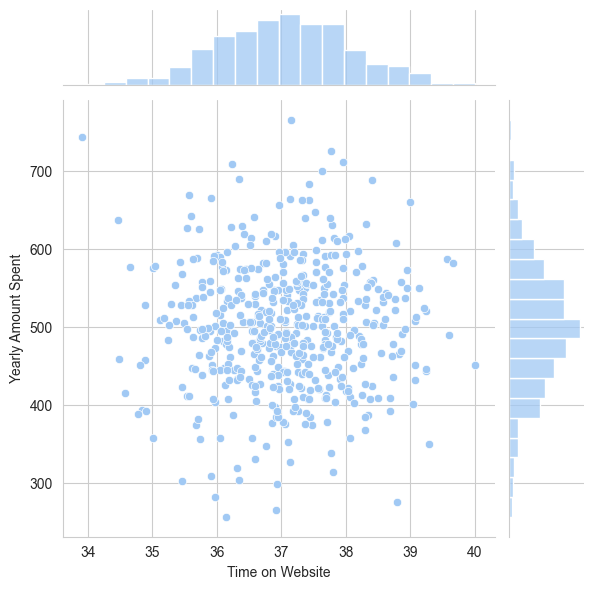

In [14]:
#Comparar variables "tiempo en el sitio"  vs "dinero gastado"
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='scatter')

** Haz lo mismo pero con la columna Tiempo en App (Time on App) en su lugar. **

In [ ]:
#Comparar variables "tiempo en el app"  vs "dinero gastado"
##

** Utilice un jointplot para crear un gráfico hexadecimal 2D que compare el tiempo en la aplicación (Time on App) y la duración de la afiliación (Length of Membership). **

ValueError: Could not interpret value `Time on Website` for `x`. Value is a string, but `data` was not passed.

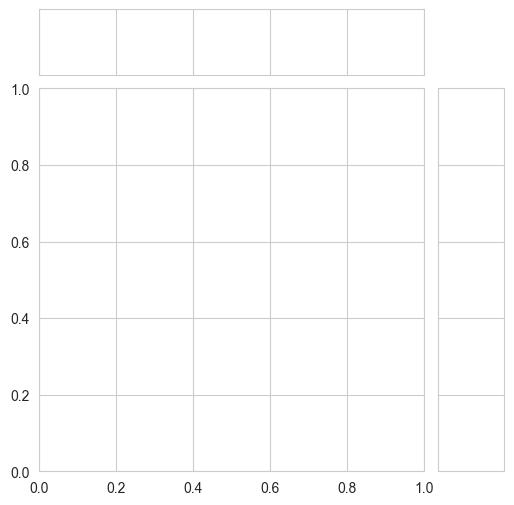

In [15]:
#Comparar variables "tiempo en el sitio"  vs "dinero gastado"
sns.jointplot(x= 'Time on Website')

**Exploremos este tipo de relaciones en todo el conjunto de datos. Utiliza [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el siguiente gráfico (no te preocupes por los colores)**.

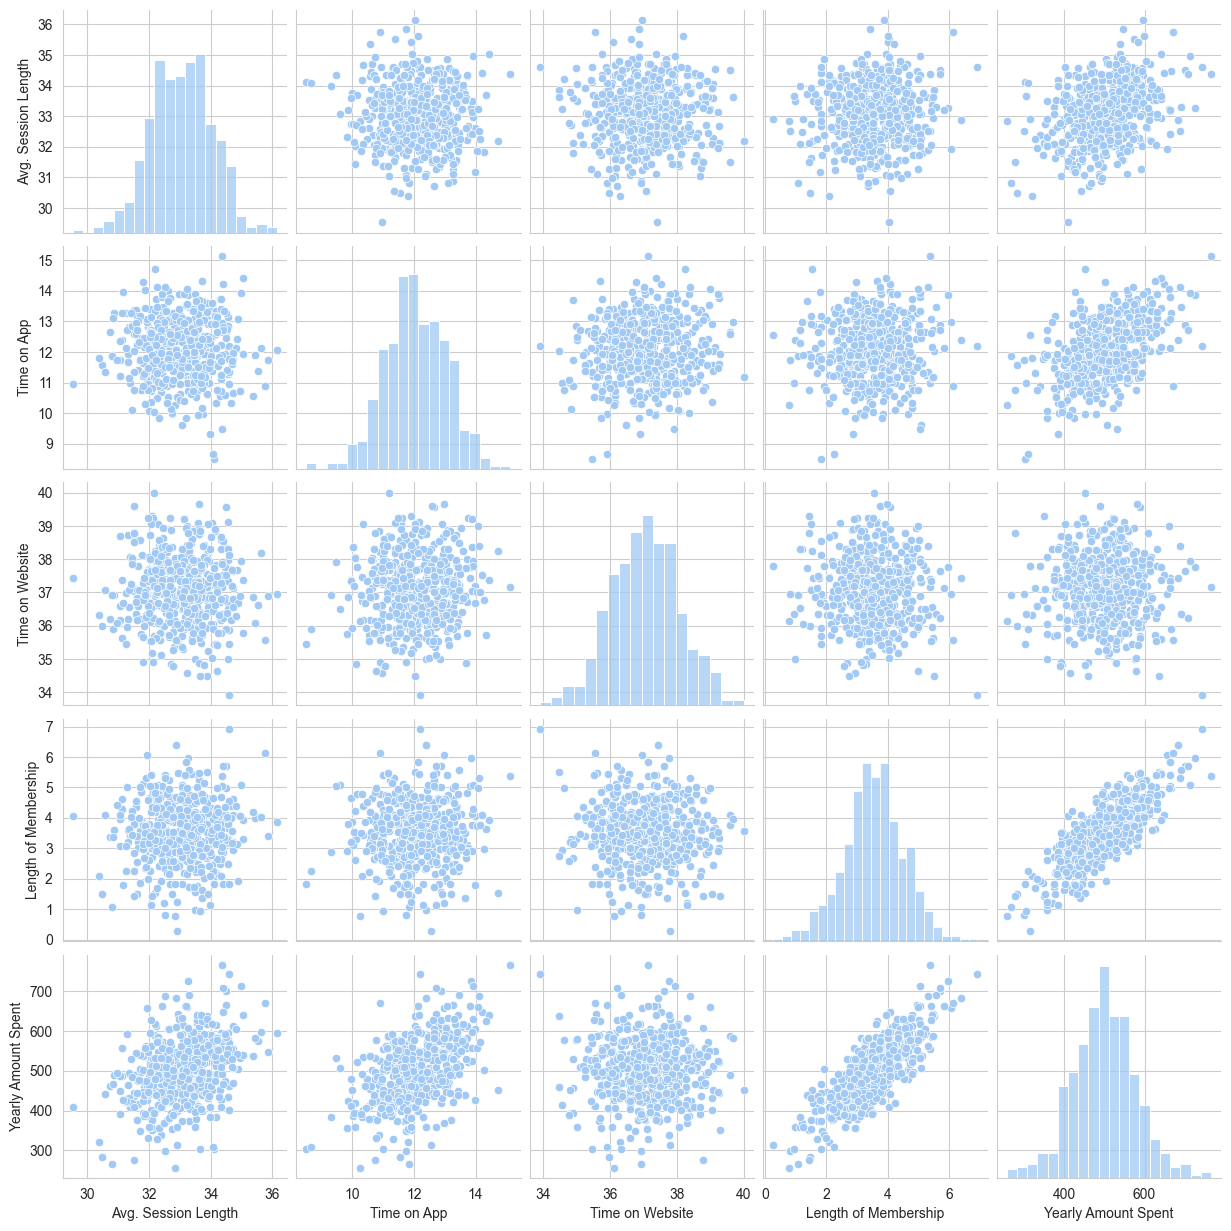

In [16]:
#Comparar todas las variables
sns.pairplot(customers)

**Basándonos en este gráfico, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada (Yearly Amount Spent)?**

In [ ]:
##

**Cree un gráfico de modelo lineal (utilizando lmplot de seaborn) de la cantidad anual gastada (Yearly Amount Spent) frente a la duración de la afiliación (Length of Membership). **

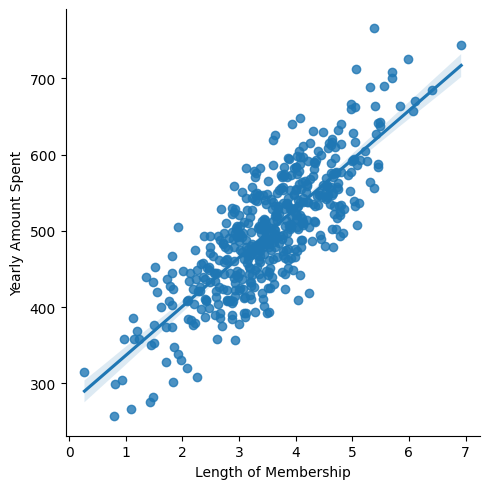

In [12]:
##Grafico de modelo lineal
sns.lmplot(x = 'Length of Membership',y='Yearly Amount Spent', data=customers)

## Entrenamiento y prueba de los datos

Ahora que hemos explorado los datos un poco, vamos a seguir adelante y dividir los datos en conjuntos de entrenamiento y prueba.

** Establece una variable X igual a las características numéricas de los clientes (Customers) y una variable Y igual a la columna "Cantidad anual gastada (Yearly Amount Spent)". **

In [13]:
#Organización de datos
#Salida
y = customers['Yearly Amount Spent']

In [15]:
#Entrada
x = customers[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]

** Utilice model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Establecer test_size=0.3 y random_state=101**.

In [16]:
#Importar función
from sklearn.model_selection import train_test_split

In [17]:
#Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Entrenamiento del modelo

¡Ahora es el momento de entrenar nuestro modelo con nuestros datos de entrenamiento!

** Importar LinearRegression de sklearn.linear_model **

In [18]:
#Importar función
from sklearn.linear_model import LinearRegression

**Crea una instancia de un modelo LinearRegression() llamado lm.**

In [19]:
#Modelo de regresión lineal
lm = LinearRegression()

** Entrena lm con los datos de entrenamiento.**

In [20]:
#Entrenar
lm.fit(x_train, y_train)

LinearRegression()

**Imprime los coeficientes del modelo.**

In [21]:
# Mostrar coeficientes
lm.coef_

array([25.37799488, 38.86056372, -0.09272773, 61.4047622 ])

## Predicción de datos de prueba
Ahora que hemos ajustado nuestro modelo, vamos a evaluar su rendimiento mediante la predicción de los valores de prueba.

** Utilice lm.predict() para predecir el conjunto X_test de los datos.**

In [22]:
#Realizar predicción
predictions = lm.predict(x_test)

** Crear un gráfico de dispersión de los valores reales de prueba frente a los valores previstos. **

Text(0, 0.5, 'Y prediccion')

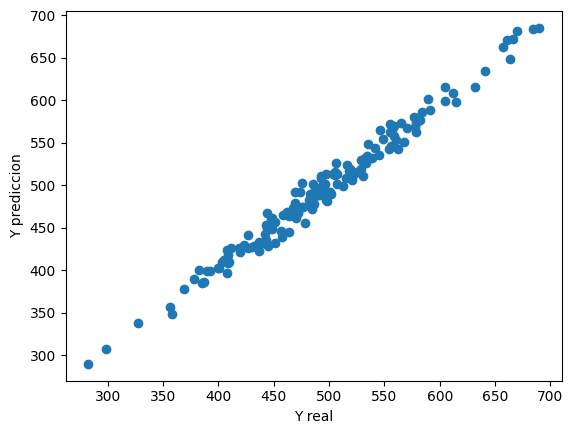

In [23]:
#Grafico de predicción
plt.scatter(y_test, predictions)
plt.xlabel('Y real')
plt.ylabel('Y prediccion')

## Evaluación del modelo

Calculemos el error medio absoluto, el error medio y el error medio cuadrático. Consulte las fórmulas en las lecturas de la clase o en Wikipedia.

In [25]:
# calcule estas metricas
from sklearn import metrics

print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))


MSE:  105.94093719069295
RMSE:  10.292761397734475
MAE:  8.380643716173237


## Residuos

Evaluemos el rendimiento de nuestro modelo calculando la suma de cuadrados residuales y la puntuación de la varianza explicada (R^2).

Debería haber obtenido un modelo muy bueno con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo estaba bien con nuestros datos.

** Grafique un histograma de los residuos y asegúrese de que se distribuyen normalmente. Use seaborn displot, o simplemente plt.hist(). **

R2_score:  0.9816472642354453


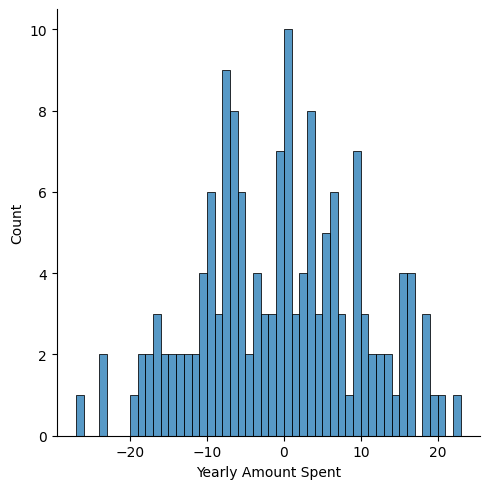

In [28]:
#Grafica de residuos y R2 score
sns.displot((y_test-predictions),bins=50)
print('R2_score: ', metrics.r2_score(y_test, predictions))

## Conclusión
Todavía queremos averiguar la respuesta a la pregunta original, ¿centramos nuestros esfuerzos en el desarrollo de aplicaciones móviles o de sitios web? O tal vez eso ni siquiera importe realmente, y el tiempo de afiliación sea lo realmente importante.  Veamos si podemos interpretar los coeficientes para hacernos una idea.

** obtén los coeficientes del modelo. **

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

** ¿Cómo puedes interpretar estos coeficientes? **

Interpretación de los coeficientes:

- Manteniendo fijas todas las demás características, un aumento de 1 unidad en la **Duración media de la sesión (Avg. Session Length	)** se asocia a un **incremento de 25,98 dólares totales gastados**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Tiempo en la aplicación (Time on App)** se asocia con un **aumento de 38,59 dólares totales gastados**.
- Manteniendo fijas todas las demás características, un aumento de 1 unidad en **Tiempo en el sitio web (Time on Website)** se asocia con un **aumento de 0,19 dólares totales gastados**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Duración de la afiliación (Length of Membership)** se asocia con un **aumento del gasto total de 61,27 dólares**.

**¿Crees que la empresa debería centrarse más en su aplicación móvil o en su sitio web?**

Hay dos maneras de pensar en esto: Desarrollar el sitio web para alcanzar el rendimiento de la aplicación móvil, o desarrollar más la aplicación, ya que es lo que está funcionando mejor. Este tipo de respuesta depende realmente de los demás factores de la empresa, por lo que probablemente sería conveniente estudiar la relación entre el número de afiliados y la aplicación o el sitio web antes de llegar a una conclusión.


---
# Regularizaciones

Vamos a probar para este ejemplo la regresión líneal con regularización"


*   Ridge: regresión lineal con regularización L2
*   Lasso: regresión lineal con regularización L1
*   ElasticNet: regresión lineal con regularización L2 y L1

Por el momento vamos a usar los parametros por defecto:



In [30]:
#Importar función
from sklearn.linear_model import Ridge
#Crear instancia del modelo
lr_ridge = Ridge(alpha=1.0)
#Entrenar
lr_ridge.fit(x_train, y_train)

Ridge()

In [31]:
#Mostrar coeficientes
lr_ridge.coef_

array([25.30677038, 38.76518102, -0.09274214, 61.23887935])

In [32]:
#Predecir
pred_ridge = lr_ridge.predict(x_test)
#Calcular metricas
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2_score:', metrics.r2_score(y_test, pred_ridge))

MAE: 8.402193316311354
MSE: 106.26132980979007
RMSE: 10.308313625893911
R2_score: 0.9815917608461501




---



In [39]:
#Importar función
from sklearn.linear_model import Lasso
#Crear instancia del modelo
lr_lasso = Lasso(alpha=1.0)
#Entrenar
lr_lasso.fit(x_train,y_train)

Lasso()

In [40]:
#Mostrar coeficientes
print('Coefficients: \n', lr_lasso.coef_)

Coefficients: 
 [24.34939077 37.9379374  -0.         60.51372524]


In [42]:
#Predecir
pred_lasso = lr_lasso.predict(x_test)
#Calcular metricas
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2_score:', metrics.r2_score(y_test, pred_lasso))

MAE: 8.714851539588825
MSE: 111.01108086413251
RMSE: 10.536179614268756
R2_score: 0.9807689351438359




---



In [35]:
#Importar función
from sklearn.linear_model import ElasticNet
#Crear instancia del modelo
lr_elastic = ElasticNet(alpha=1, l1_ratio=0.5)
#Entrenar
lr_elastic.fit(x_train,y_train)

ElasticNet(alpha=1)

In [36]:
#Mostrar coeficientes
print('Coefficients: \n', lr_elastic.coef_)

Coefficients: 
 [16.65523907 26.82999228 -0.         41.36391598]


In [38]:
#Predecir
pred_elastic= lr_elastic.predict(x_test)
#Calcular metricas
print('MAE:', metrics.mean_absolute_error(y_test, pred_elastic))
print('MSE:', metrics.mean_squared_error(y_test, pred_elastic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_elastic)))
print('R2_score:', metrics.r2_score(y_test, pred_elastic))

MAE: 21.665927309033236
MSE: 736.4614546047836
RMSE: 27.13782332105476
R2_score: 0.8724187001214434
